# Exploration of SimpleQA

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_table('../ferhan_simple_qa_rnn/data/SimpleQuestions_v2/annotated_fb_data_train.txt', names=['entity', 'relation', 'obj', 'q'], header=None)
validation = pd.read_table('../ferhan_simple_qa_rnn/data/SimpleQuestions_v2/annotated_fb_data_valid.txt', names=['entity', 'relation', 'obj', 'q'], header=None)
test = pd.read_table('../ferhan_simple_qa_rnn/data/SimpleQuestions_v2/annotated_fb_data_test.txt', names=['entity', 'relation', 'obj', 'q'], header=None)

Here we have the sizes of the training, validation, and test sets:

In [3]:
[len(train), len(validation), len(test)]

[75910, 10845, 21687]

## Analysis of Unseen Relations

Number of unique relations in the training set:

In [4]:
train['relation'].unique().size

1629

Number of unique relations in the training + validation sets:

In [5]:
pd.concat([train, validation])['relation'].unique().size

1698

Number of unique relations in the training + validation + test sets:

In [6]:
pd.concat([train, validation, test])['relation'].unique().size

1837

So, number of relations that are *only* see in the test set (i.e., we have no training examples):

In [7]:
1837 - 1698

139

In [8]:
seen_rels = pd.concat([train, validation])['relation'].unique().T.tolist()

In [9]:
len(test[test['relation'].isin(seen_rels)])

21537

So this is the upper bound accuracy:

In [10]:
len(test[test['relation'].isin(seen_rels)])/len(test)

0.9930834140268363

The conclusion is that unseen relationships aren't really an issue

## Distributions of Relations (in Training Set)

In [11]:
r_cnts = train['relation'].value_counts().reset_index().rename(columns={'index': 'relation', 'relation': 'count'})

The ten most popular relations in the training set:

In [12]:
r_cnts.head(10)

,relation,count
0,www.freebase.com/people/person/place_of_birth,2720
1,www.freebase.com/location/location/containedby,2472
2,www.freebase.com/people/person/nationality,2426
3,www.freebase.com/film/film/genre,2173
4,www.freebase.com/people/person/gender,1928
5,www.freebase.com/common/topic/notable_types,1610
6,www.freebase.com/music/artist/genre,1553
7,www.freebase.com/music/album/genre,1537
8,www.freebase.com/location/location/people_born...,1409
9,www.freebase.com/people/deceased_person/place_...,1380


The number of singleton relationships:

In [13]:
r_cnts[r_cnts['count'] == 1].count()

relation    563
count       563
dtype: int64

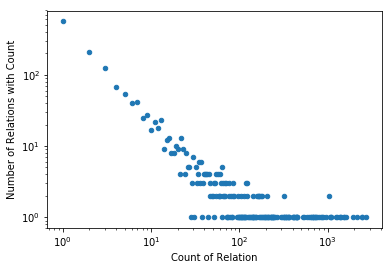

In [14]:
% matplotlib inline
plot = r_cnts.groupby('count').count().reset_index() \
    .rename(columns={'relation': 'count_of_count'}) \
    .plot(kind='scatter', x='count', y='count_of_count', logy=True, logx=True) \
    .set(xlabel='Count of Relation', ylabel='Number of Relations with Count')

## Distributions of Entities (in Training Set)

In [15]:
e_cnts = train['entity'].value_counts().reset_index().rename(columns={'index': 'entity', 'entity': 'count'})

The ten most popular relations in the training set:

In [16]:
e_cnts.head(10)

,entity,count
0,www.freebase.com/m/02lx2r,305
1,www.freebase.com/m/07s9rl0,249
2,www.freebase.com/m/09c7w0,215
3,www.freebase.com/m/02jbfk,187
4,www.freebase.com/m/06by7,141
5,www.freebase.com/m/0jtdp,120
6,www.freebase.com/m/02nzb8,109
7,www.freebase.com/m/0jvq,99
8,www.freebase.com/m/02hrh1q,98
9,www.freebase.com/m/06p5g,97


The number of singleton relationships:

In [17]:
e_cnts[e_cnts['count'] == 1].count()

entity    60378
count     60378
dtype: int64

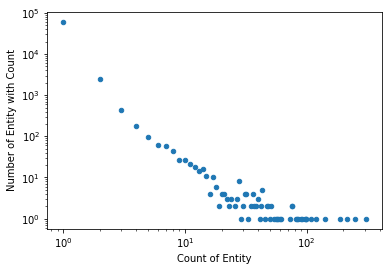

In [18]:
plot = e_cnts.groupby('count').count().reset_index() \
    .rename(columns={'entity': 'count_of_count'}) \
    .plot(kind='scatter', x='count', y='count_of_count', logy=True, logx=True) \
    .set(xlabel='Count of Entity', ylabel='Number of Entity with Count')